<a href="https://colab.research.google.com/github/DCC773/REGRESION-LINEAL/blob/main/Copia_de_GRADIENTE_DESCENDETE_EJEMPLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. INTRODUCCION

En esta tarea se presenta un ejemplo aplicado del algoritmo de gradiente descendente para estimar los parámetros de un modelo económico. Se emplea el enfoque clásico de Keynes, en el que el consumo privado depende del ingreso disponible. Utilizaremos datos reales del Banco Central de Reserva del Perú (BCRP) para el período 2000–2024

2. OBJETIVO

Aplicar el método de gradiente descendente para estimar los parámetros del modelo lineal de consumo:

           C=c_0+cYD

donde:

C: consumo privado,


Y
d
​
 : ingreso nacional disponible,


 C_0: consumo autónomo (intercepto),

c: propensión marginal a consumir (pendiente)           



3. FUNDAMENTO TEORICO

El gradiente descendente es un algoritmo de optimización que busca minimizar una función de costo. En este caso, la función de costo es el error cuadrático medio (MSE) entre los valores reales y predichos de consumo.
En ese sentido, se iran ajustando los coeficientes del modelo utlizando las derivadas parciales con respecto a los parametros


4. Datos reales

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Datos del BCRP 2000–2024 (millones de S/ constantes 2007)
#CONSUMO
consumo = np.array([
    36727.17, 36490.59, 38332.33, 39490.81, 40576.38,
    42293.98, 45031.08, 49355.00, 51828.40, 54264.98,
    59386.94, 62640.13, 67896.08, 72005.89, 74342.98,
    77488.16, 80184.17, 82418.46, 85672.86, 88314.23,
    85938.00, 90121.00, 92078.82, 92165.50, 95890.00
])
# INGRESO DISPONIBLE
yd = np.array([
    188541, 190149, 203202, 209707, 222235,
    235945, 271594, 303262, 319732, 325204,
    366678, 393182, 420369, 441123, 454059,
    467021, 489074, 506832, 522162, 541109,
    501693, 553693, 557804, 578056, 619853
])


 5. IMPLEMENTACION DEL MODELO CON GRADIANTE DESCENDENTE



In [ ]:
# Normalización
scaler = StandardScaler()
yd_norm = scaler.fit_transform(yd.reshape(-1,1)).flatten()
consumo_norm = (consumo - consumo.mean()) / consumo.std()

# Inicialización
m = 0.0  # pendiente (propensión marginal a consumir)
b = 0.0  # intercepto (consumo autónomo)
alpha = 0.01
epochs = 3000
errores = []

# Gradiente descendente
for _ in range(epochs):
    y_pred = m * yd_norm + b
    error = ((consumo_norm - y_pred) ** 2).mean()
    errores.append(error)

    # Derivadas
    d_m = -2 * np.mean((consumo_norm - y_pred) * yd_norm)
    d_b = -2 * np.mean(consumo_norm - y_pred)

    # Actualización
    m -= alpha * d_m
    b -= alpha * d_b
print(f"Propensión marginal a consumir (c): {round(m, 4)}")
print(f"Consumo autónomo estimado (C₀ normalizado): {round(b, 4)}")
print(f"Error final (MSE): {round(errores[-1], 6)}")


Propensión marginal a consumir (c): 0.996
Consumo autónomo estimado (C₀ normalizado): -0.0
Error final (MSE): 0.007995


La estimación del modelo keynesiano muestra que la propensión marginal a consumir es de 0.996, lo que indica que por cada sol adicional de ingreso disponible, las familias consumen casi la totalidad (S/ 0.996), reflejando una baja propensión al ahorro. El consumo autónomo estimado es prácticamente cero, lo cual se debe a la normalización de los datos y no necesariamente refleja la realidad. El error cuadrático medio (MSE) de 0.00799 es muy bajo, lo que indica que el modelo ajusta bien a los datos reales entre 2000 y 2024, confirmando que el ingreso disponible explica en gran medida el comportamiento del consumo en la economía peruana.

6. VISIALUZACION DE RESULTADOS

a) Evolucion del error


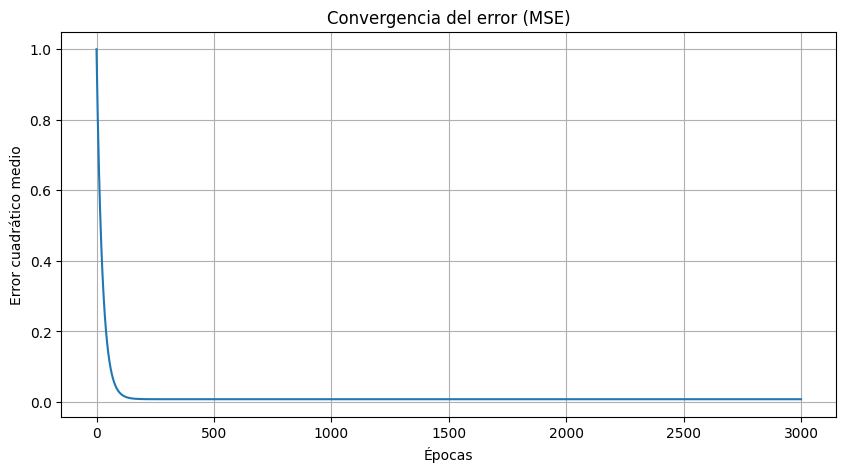

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(errores)
plt.title("Convergencia del error (MSE)")
plt.xlabel("Épocas")
plt.ylabel("Error cuadrático medio")
plt.grid(True)
plt.show()


B) Ajuste del modelo: Valores reales, vs valores predichos

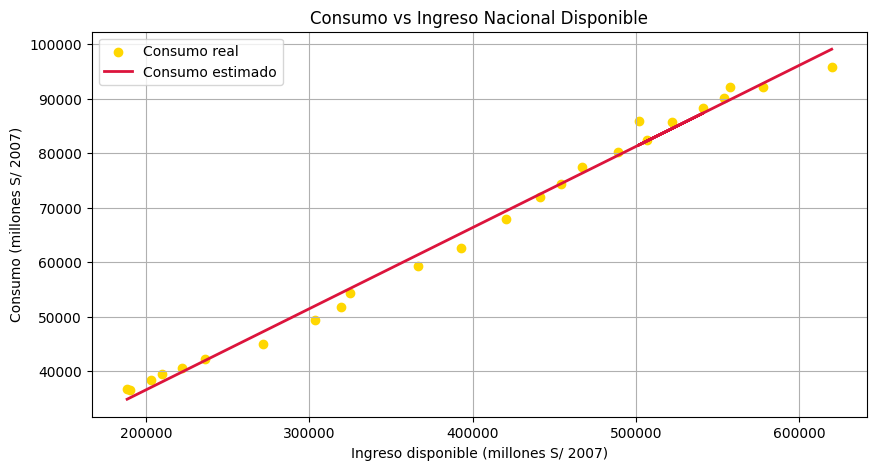

In [ ]:
# Re-escalar para graficar con valores reales
consumo_pred_norm = m * yd_norm + b
consumo_pred = consumo_pred_norm * consumo.std() + consumo.mean()

plt.figure(figsize=(10, 5))
plt.scatter(yd, consumo, color="gold", label="Consumo real")
plt.plot(yd, consumo_pred, color="crimson", linewidth=2, label="Consumo estimado")
plt.title("Consumo vs Ingreso Nacional Disponible")
plt.xlabel("Ingreso disponible (millones S/ 2007)")
plt.ylabel("Consumo (millones S/ 2007)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import r2_score
# HALLAR EL COEFICIENTE DE DETERMINACION

r2 = r2_score(consumo, consumo_pred)
print(f"Coeficiente de determinación (R²): {r2:.4f}")


Coeficiente de determinación (R²): 0.9920


7) CONCLUSION

El modelo muestra que el consumo en el Perú está fuertemente relacionado con el ingreso disponible. La propensión marginal a consumir es de 0.996, lo que significa que por cada sol adicional de ingreso, las familias gastan casi todo en consumo. Además, el modelo tiene un R² de 0.992, lo que indica que explica el 99.2% del comportamiento del consumo